            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


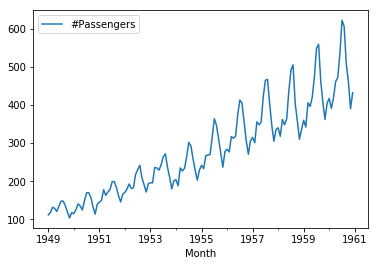

In [12]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime(x, '%Y-%m')
    
series = read_csv('air.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

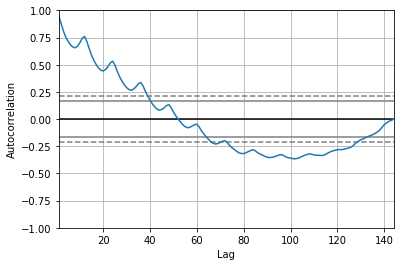

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA
#fit model
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -700.874
Method:                       css-mle   S.D. of innovations             31.121
Date:                Thu, 14 Mar 2019   AIC                           1409.748
Time:                        13:22:57   BIC                           1421.628
Sample:                    01-01-1949   HQIC                          1414.575
                         - 12-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               281.4437     53.618      5.249      0.000     176.354     386.533
ar.L1.#Passengers     0.9373      0.030     31.045      0.000       0.878       0.996
ma.L1.#Passengers     0.

c:\users\jalaj\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


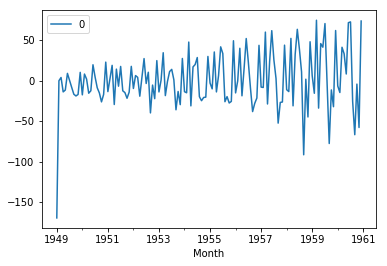

In [16]:
# plot residual errors
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

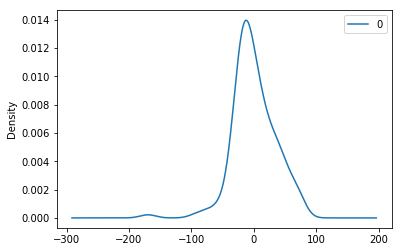

In [17]:
residuals.plot(kind='kde')
pyplot.show()

In [18]:
print(residuals.describe())

                0
count  144.000000
mean     0.459088
std     34.111186
min   -169.443723
25%    -18.576100
50%     -3.943800
75%     20.537552
max     74.471040


In [19]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=257.724257, expected=306.000000
predicted=318.706162, expected=315.000000
predicted=304.916193, expected=301.000000
predicted=291.817667, expected=356.000000
predicted=373.315986, expected=348.000000
predicted=329.002752, expected=355.000000
predicted=354.108574, expected=422.000000
predicted=437.813674, expected=465.000000
predicted=464.827834, expected=467.000000
predicted=456.918122, expected=404.000000
predicted=368.778632, expected=347.000000
predicted=327.811997, expected=305.000000
predicted=286.947734, expected=336.000000
predicted=350.242287, expected=340.000000
predicted=327.143794, expected=318.000000
predicted=306.873334, expected=362.000000
predicted=378.304499, expected=348.000000
predicted=326.714525, expected=363.000000
predicted=367.433207, expected=435.000000
predicted=452.362901, expected=491.000000
predicted=496.049349, expected=505.000000
predicted=496.614821, expected=404.000000
predicted=345.198163, expected=359.000000
predicted=355.204245, expected=310